# Jonathan Halverson
# Thursday, March 16, 2017
# Part 7: Is ring rust real?

One problem with this calculation is that it assumes that fighters do not fight outside the UFC in between fights.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('halverson')
%matplotlib inline

In [9]:
iofile = 'data/fightmetric_cards/fightmetric_fights_CLEAN_3-6-2017.csv'
fights = pd.read_csv(iofile, header=0, parse_dates=['Date'])
fights.head(3)

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,Location
0,Germaine de Randamie,def.,Holly Holm,Women's Featherweight,U-DEC,NaN,5,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"
1,Anderson Silva,def.,Derek Brunson,Middleweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"
2,Jacare Souza,def.,Tim Boetsch,Middleweight,SUB,Kimura,1,3:41,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"


In [10]:
fights = fights[fights.Date > pd.to_datetime('2005-01-01')]

In [11]:
from collections import defaultdict

wins = defaultdict(int)
total = defaultdict(int)
win_lose = fights.Winner.append(fights.Loser).unique()
for fighter in win_lose:
     msk = (fights.Winner == fighter) | (fights.Loser == fighter)
     all_fights = fights[msk].sort_values('Date').reset_index()
     if all_fights.shape[0] > 1:
          for i in range(0, all_fights.shape[0] - 1):
               # 30.4375 = (3 * 365 + 366) / 48.
               months = (all_fights.loc[i + 1, 'Date'] - all_fights.loc[i, 'Date']) / pd.to_timedelta('30.4375 days')
               months = round(months)
               if (all_fights.loc[i + 1, 'Winner'] == fighter): wins[months] += 1
               total[months] += 1

In [12]:
ws = pd.Series(data=wins.values(), index=wins.keys())
ts = pd.Series(data=total.values(), index=total.keys())

In [13]:
df = pd.DataFrame([ws, ts]).T
df.columns = ['wins', 'total']
df = df.loc[1:24]
df['WinRatio'] = df.wins / df.total
df['2se'] = 1.96 * np.sqrt(df.WinRatio * (1 - df.WinRatio) / df.total)
df

,wins,total,WinRatio,2se
1.0,25.0,52.0,0.480769,0.135801
2.0,165.0,326.0,0.506135,0.054273
3.0,420.0,816.0,0.514706,0.034292
4.0,583.0,1104.0,0.528080,0.029448
5.0,542.0,1026.0,0.528265,0.030546
6.0,390.0,735.0,0.530612,0.036080
7.0,253.0,468.0,0.540598,0.045151
8.0,138.0,285.0,0.484211,0.058021
9.0,147.0,250.0,0.588000,0.061013
10.0,81.0,165.0,0.490909,0.076280


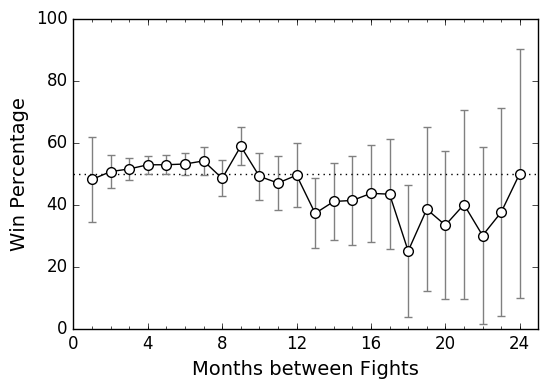

In [14]:
fig, ax = plt.subplots()
plt.plot([0, 25], [50, 50], 'k:')
plt.errorbar(df.index, 100 * df.WinRatio, color='k', marker='o', yerr=100*df['2se'], ecolor='gray', capthick=1, mfc='w', ms=7)
#plt.plot(df.index, 100 * df.WinRatio, 'wo')
plt.xlabel('Months between Fights')
plt.ylabel('Win Percentage')
plt.xlim(0, 25)
plt.ylim(0, 100)
major_ticks = np.arange(0, 28, 4)
ax.set_xticks(major_ticks)
minor_ticks = np.arange(0, 25, 1)
ax.set_xticks(minor_ticks, minor = True)
plt.savefig('report/ring_rust.pdf', bbox_inches='tight')